# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Importing dependencies and API key
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from api_keys import weather_api_key

# import time #for plotting
from scipy.stats import linregress

# Citipy is a dependency we also use in our project work
from citipy import citipy


## Generate Cities List

In [2]:
# List for holding latitudes_longitudes and cities
latitudes_longitudes = []
cities = []

# Ranges for latitudes and longitudes
latitude_range = (-90, 90)
longitude_range = (-180, 180)

# Using numpy I create a number of randomised longitudes and latitudes
latitudes = np.random.uniform(latitude_range[0], latitude_range[1], size=1500)
longitudes = np.random.uniform(longitude_range[0], longitude_range[1], size=1500)
latitudes_longitudes = zip(latitudes, longitudes)

# For the values above I find the nearest city using citipy's nearest_city function
for lat_lng in latitudes_longitudes:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)

#Show cities to prove that it found some
cities

['katsuura',
 'bredasdorp',
 'arlit',
 'shenzhen',
 'norilsk',
 'santa cruz del sur',
 'mataura',
 'oranjemund',
 'attawapiskat',
 'albany',
 'jamestown',
 'statesville',
 'teguldet',
 'cape town',
 'busselton',
 'luganville',
 'punta arenas',
 'hilo',
 'zabaykalsk',
 'faanui',
 'padang',
 'raudeberg',
 'ushuaia',
 'kavieng',
 'khatanga',
 'nishihara',
 'bengkulu',
 'rikitea',
 'vaini',
 'hermanus',
 'fortuna',
 'bluff',
 'aklavik',
 'esperance',
 'pilar',
 'havoysund',
 'diego de almagro',
 'yellowknife',
 'geraldton',
 'basco',
 'sandy bay',
 'chuy',
 'glyadyanskoye',
 'amderma',
 'warrnambool',
 'faridkot',
 'belushya guba',
 'alofi',
 'puerto ayora',
 'kingaroy',
 'provideniya',
 'avarua',
 'ilinsko-podomskoye',
 'pangody',
 'kahului',
 'severo-kurilsk',
 'victoria',
 'barrow',
 'georgetown',
 'atuona',
 'kapaa',
 'kollegal',
 'vigrestad',
 'zhezkazgan',
 'chokurdakh',
 'alice springs',
 'bandarbeyla',
 'roald',
 'mar del plata',
 'marsa matruh',
 'hobart',
 'cabo san lucas',
 'ine

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#couldn't use 3.0 version, had to use v2.5 for the cities
url = "https://api.openweathermap.org/data/2.5/weather?q="

#Temperature units in Fahrenheit
unit = "imperial"


# Lists for results
lat = []
lon = []
citiesfound = []
temp = []
humidity = []
cloudiness = []
windSpeed = []
country = []

for city in cities:
    query_url = f"{url}{city}&appid={weather_api_key}&units={unit}"
    response = requests.get(query_url).json()
    try:
        
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windSpeed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        citiesfound.append(city)
        print(f"City found: {city}")
    except:
        print(f"City NOT found: {city}")
    #time.sleep(1)
    

City found: katsuura
City found: bredasdorp
City found: arlit
City found: shenzhen
City found: norilsk
City found: santa cruz del sur
City found: mataura
City found: oranjemund
City NOT found: attawapiskat
City found: albany
City found: jamestown
City found: statesville
City found: teguldet
City found: cape town
City found: busselton
City found: luganville
City found: punta arenas
City found: hilo
City found: zabaykalsk
City found: faanui
City found: padang
City found: raudeberg
City found: ushuaia
City found: kavieng
City found: khatanga
City found: nishihara
City found: bengkulu
City found: rikitea
City found: vaini
City found: hermanus
City found: fortuna
City found: bluff
City found: aklavik
City found: esperance
City found: pilar
City found: havoysund
City found: diego de almagro
City found: yellowknife
City found: geraldton
City found: basco
City found: sandy bay
City found: chuy
City found: glyadyanskoye
City NOT found: amderma
City found: warrnambool
City found: faridkot
City N

In [4]:
Weather_DF = pd.DataFrame({"City": citiesfound,
                           "Country": country,
                           "Temperature": temp,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Windspeed":windSpeed,
                           "Latitude": lat,
                           "Longitude": lon
                          })
Weather_DF

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude
0,katsuura,JP,70.93,93,90,7.47,35.1333,140.3000
1,bredasdorp,ZA,69.03,54,97,4.21,-34.5322,20.0403
2,arlit,NE,103.91,15,2,6.35,18.7369,7.3853
3,shenzhen,CN,87.28,83,93,7.54,22.5455,114.0683
4,norilsk,RU,83.43,26,63,14.47,69.3535,88.2027
...,...,...,...,...,...,...,...,...
563,yablonovo,RU,68.23,68,100,3.89,50.8523,37.3574
564,kendari,ID,74.35,95,100,0.36,-3.9450,122.4989
565,zhigansk,RU,62.17,69,44,11.25,66.7697,123.3711
566,graaff-reinet,ZA,66.40,40,100,7.47,-32.2522,24.5308


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:


# output data to csv
Weather_DF.to_csv("../output_data/weather_df.csv")
Weather_DF

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude
0,katsuura,JP,70.93,93,90,7.47,35.1333,140.3000
1,bredasdorp,ZA,69.03,54,97,4.21,-34.5322,20.0403
2,arlit,NE,103.91,15,2,6.35,18.7369,7.3853
3,shenzhen,CN,87.28,83,93,7.54,22.5455,114.0683
4,norilsk,RU,83.43,26,63,14.47,69.3535,88.2027
...,...,...,...,...,...,...,...,...
563,yablonovo,RU,68.23,68,100,3.89,50.8523,37.3574
564,kendari,ID,74.35,95,100,0.36,-3.9450,122.4989
565,zhigansk,RU,62.17,69,44,11.25,66.7697,123.3711
566,graaff-reinet,ZA,66.40,40,100,7.47,-32.2522,24.5308


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [6]:
#  Get the indices of cities that have humidity over 100%.

# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_dataframe = Weather_DF[(Weather_DF['Humidity'] <100)]
clean_city_dataframe

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude
0,katsuura,JP,70.93,93,90,7.47,35.1333,140.3000
1,bredasdorp,ZA,69.03,54,97,4.21,-34.5322,20.0403
2,arlit,NE,103.91,15,2,6.35,18.7369,7.3853
3,shenzhen,CN,87.28,83,93,7.54,22.5455,114.0683
4,norilsk,RU,83.43,26,63,14.47,69.3535,88.2027
...,...,...,...,...,...,...,...,...
563,yablonovo,RU,68.23,68,100,3.89,50.8523,37.3574
564,kendari,ID,74.35,95,100,0.36,-3.9450,122.4989
565,zhigansk,RU,62.17,69,44,11.25,66.7697,123.3711
566,graaff-reinet,ZA,66.40,40,100,7.47,-32.2522,24.5308


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

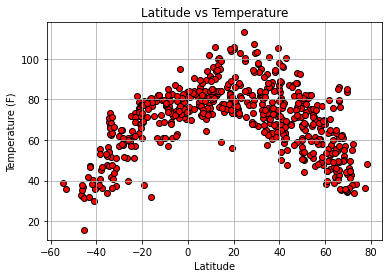

In [8]:
Weather_DF = pd.read_csv("../output_data/weather_df.csv")
City_Data = Weather_DF[["City","Country", "Latitude", "Temperature", "Humidity", "Cloudiness", "Windspeed"]]



#set data to plot
x = City_Data["Latitude"]
y = City_Data["Temperature"]
plt.scatter(x,y,edgecolors="black",facecolors="red")
#add gridlines
plt.grid()
#add titles and axis labels
plt.title(f"Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
#export as png
plt.savefig(f'../output_data/Latitude vs Temperature.png')
#display plot!
plt.show()


# This chart shows that there is significant correlation between the latitude and the temperature. The closer cities are to the equator (zero degrees), the more likely that they have higher temperature. 
# This will also be shown in the linear regression

## Latitude vs. Humidity Plot

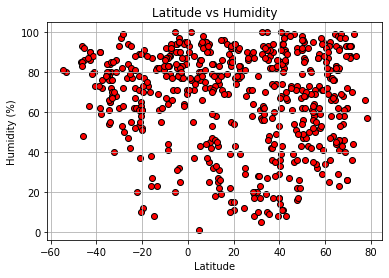

In [9]:
#set data to plot; retain Latitude from previous plot as "x"
humidity_chart = City_Data["Humidity"]
plt.scatter(x,humidity_chart,edgecolors="black",facecolors="red")
plt.title(f"Latitude vs Humidity")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig(f'../output_data/Latitude vs Humidity.png')
plt.show()

# This chart shows that there is no correlation between the latitude and humidity

## Latitude vs. Cloudiness Plot

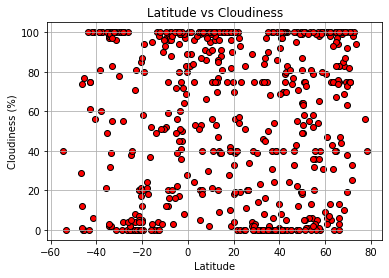

In [10]:
cloudiness_chart = City_Data["Cloudiness"]
plt.scatter(x,cloudiness_chart,edgecolors="black",facecolors="red")
plt.title(f"Latitude vs Cloudiness")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig(f'../output_data/Latitude vs Cloudiness.png')
plt.show()

# This chart shows that there is no correlation between the latitude and the cloudiness

## Latitude vs. Wind Speed Plot

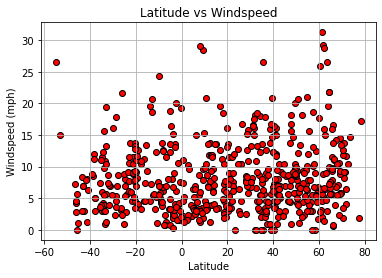

In [11]:
windspeed_chart = City_Data["Windspeed"]
plt.scatter(x,windspeed_chart,edgecolors="black",facecolors="red")
plt.title(f"Latitude vs Windspeed")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.savefig(f'../output_data/Latitude vs Windspeed.png')
plt.show()

# This chart shows that there is no correlation between the latitude and the wind speed

## Linear Regression

In [12]:
# x_values: first set of data (always latitude)
# y_values: second set of data (temperature, humidity, cloudiness, wind speed)
# regEQplotX: where the linear regression equasion appears on the plot x line
# regEQplotY: where the linear regression equasion appears on the plot y line
# y_label: the y axis label of the plot (x label is always Latitude)

def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, edgecolors="black",facecolors="lightgreen")
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is -0.6539805123183255
y = -0.52x + 92.22


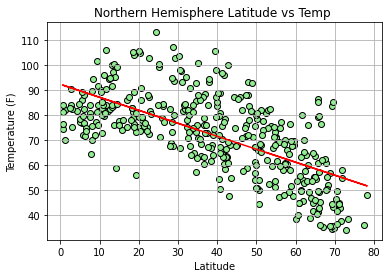

In [13]:
# Create Northern and Southern Hemisphere DataFrames based on latitude value
Northern_DF = Weather_DF.loc[Weather_DF["Latitude"] > 0]
Southern_DF = Weather_DF.loc[Weather_DF["Latitude"] < 0]

#Chart plotting
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Temperature"]
regEQplotX = -25
regEQplotY = 40
y_label = "Temperature (F)"
plt.title(f'Northern Hemisphere Latitude vs Temp ')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Temp.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is 0.7900538982845071
y = 0.89x + 82.94


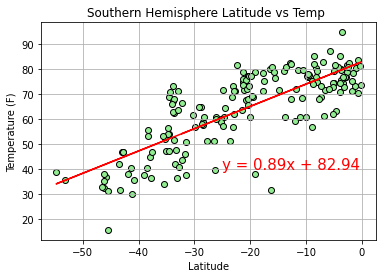

In [14]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Temperature"]
regEQplotX = -25
regEQplotY = 40
y_label = "Temperature (F)"
plt.title(f'Southern Hemisphere Latitude vs Temp ')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Temp.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is 0.026280147784170663
y = 0.03x + 63.53


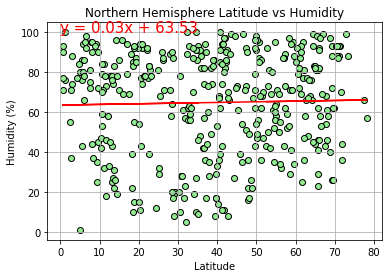

In [15]:
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Humidity"]
regEQplotX = 0
regEQplotY = 100 #max value in percentage
y_label = "Humidity (%)"
plt.title(f'Northern Hemisphere Latitude vs Humidity')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Humidity.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is -0.014078046507475666
y = -0.02x + 71.88


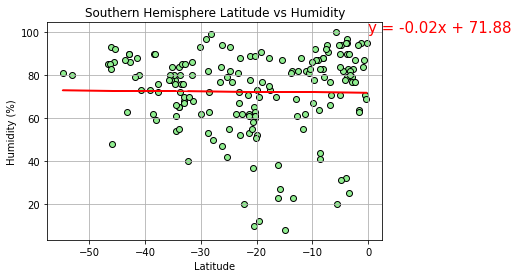

In [16]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Humidity"]
regEQplotX = 0
regEQplotY = 100 #max value in percentage
y_label = "Humidity (%)"
plt.title(f'Southern Hemisphere Latitude vs Humidity')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Humidity.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is -0.024906674865209495
y = -0.05x + 57.63


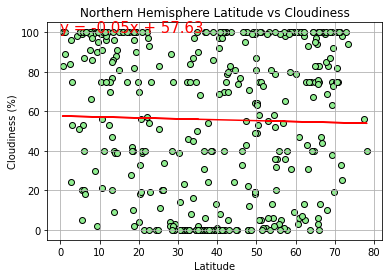

In [17]:
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Cloudiness"]
regEQplotX = 0
regEQplotY = 100 #max value in %
y_label = "Cloudiness (%)"
plt.title(f'Northern Hemisphere Latitude vs Cloudiness')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Cloudiness.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is 0.06480954488596335
y = 0.19x + 57.36


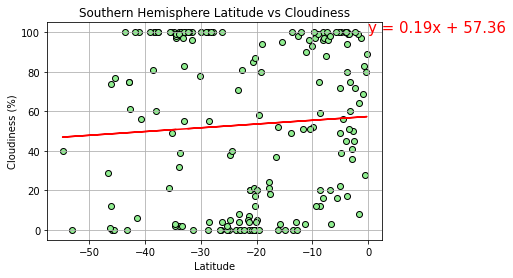

In [18]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Cloudiness"]
regEQplotX = 0
regEQplotY = 100 #max value in %
y_label = "Cloudiness (%)"
plt.title(f'Southern Hemisphere Latitude vs Cloudiness')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Cloudiness.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is 0.14300325113412304
y = 0.04x + 6.83


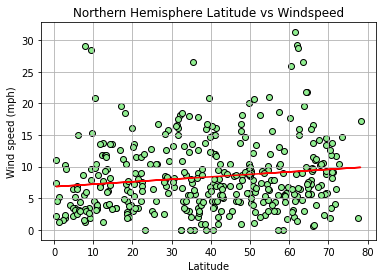

In [19]:
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Windspeed"]
regEQplotX = 0
regEQplotY = 50 
y_label = "Wind speed (mph)"
plt.title(f'Northern Hemisphere Latitude vs Windspeed')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Windspeed.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is -0.008074503068136344
y = -0.0x + 7.52


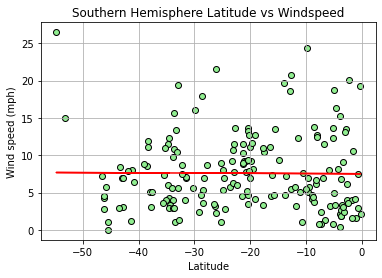

In [20]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Windspeed"]
regEQplotX = 0
regEQplotY = 50 
y_label = "Wind speed (mph)"
plt.title(f'Southern Hemisphere Latitude vs Windspeed')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Windspeed.png')
plt.show()